In [1]:
import healpy as hpy
import datetime

from ACOSchedule import *
from functions import conversion
from functions import deconversion
from matplotlib import animation
from animation_path import *

date_aux="2017/03/09 23:00:00"

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#Initializing the observer instance
obs=ephem.Observer()
obs.lat="-33:27:00"
obs.lon="-70:40:00"
obs.date=date_aux
#-------------------

In [3]:
#Calculating the Healpix discretization
Nside=16
Npix=hpy.pixelfunc.nside2npix(Nside)
ipixmin=int(Npix/2)
ipixmin=0
X=np.transpose(np.array(hpy.pixelfunc.pix2ang(Nside,np.arange(ipixmin,Npix,1))))
X[:,0] = np.pi/2-X[:,0]
#X[:,1] = X[:,1]-np.pi
#X*=180/np.pi
Num=np.size(X,0)
#---------------------------------

In [4]:
#Times since last visit
#T = npr.randint(6, size=Num)+1
if Num == 1536:
	T=np.load('Times.npy')
elif Num == 6144:
	T=np.load('Times32.npy')
elif Num == 3072:
    T=np.load('Times_complete.npy')
elif Num == 12288:
    T=np.load('Times32_complete.npy')
else:
    print 'Times since last observations created randomly'
    T=npr.randint(0,6,Num)
#-------------------------

In [5]:
ACO=ACOSchedule(X,obs,15,T)

2017-05-15 11:31:45.202027
0.479142396813
2017/3/9 23:31:13
2017/3/10 00:17:13
2017/3/10 01:03:13
2017/3/10 01:49:13
2017/3/10 02:35:13
2017/3/10 03:21:12
2017/3/10 04:07:12
2017/3/10 04:53:12
2017/3/10 05:39:12
2017/3/10 06:25:12
2017/3/10 07:11:12
2017/3/10 07:57:12
2017/3/10 08:43:11
2017/3/10 09:29:11
2017/3/10 10:15:11
0.00138888888889
Construccion Completa

2017-05-15 11:32:24.209022


*****************Super Ants******************
*****************Ants******************
0 0 2017-05-15 11:32:24.215161


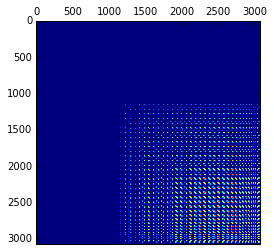

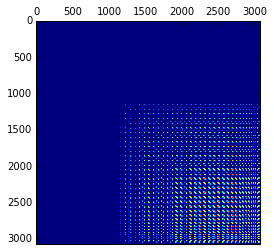

new non dominated solution 2017-05-15 11:33:12.237099
new non dominated solution 2017-05-15 11:33:12.237489
new non dominated solution 2017-05-15 11:33:12.237685
new non dominated solution 2017-05-15 11:33:12.237870
new non dominated solution 2017-05-15 11:33:12.238058
new non dominated solution 2017-05-15 11:33:12.238248
1 6 2017-05-15 11:33:12.246836


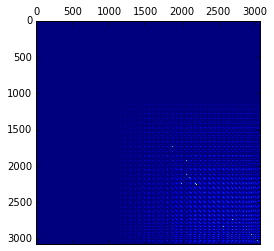

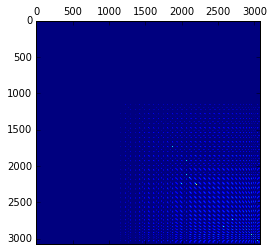

new non dominated solution 2017-05-15 11:33:57.753746
new non dominated solution 2017-05-15 11:33:57.754186
2 6 2017-05-15 11:33:57.758645


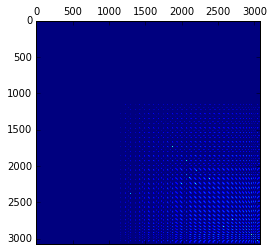

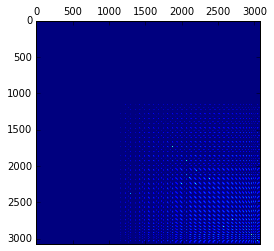

new non dominated solution 2017-05-15 11:34:43.057789
3 5 2017-05-15 11:34:43.072272


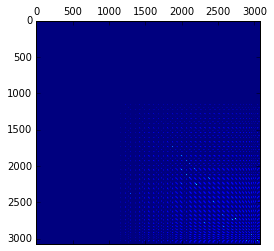

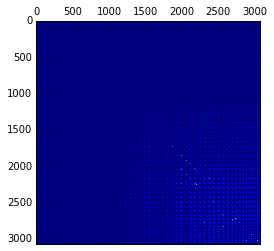

new non dominated solution 2017-05-15 11:35:46.053078
new non dominated solution 2017-05-15 11:35:46.053443
new non dominated solution 2017-05-15 11:35:46.053847
new non dominated solution 2017-05-15 11:35:46.054107
4 7 2017-05-15 11:35:46.066703


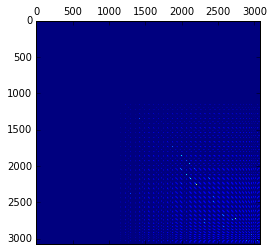

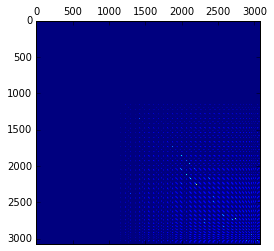

new non dominated solution 2017-05-15 11:36:39.225265
8


In [6]:
ACO.RunACO_Pheromone(0,5)
print len(ACO.BPS)

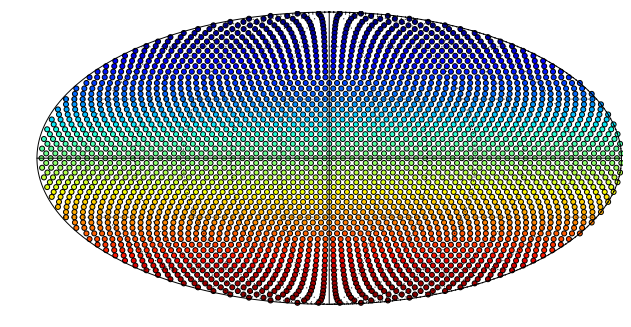

In [7]:
#ACO.X = np.transpose(np.array(hpy.pixelfunc.pix2ang(Nside,np.arange(0,Npix,1))))
#ACO.X[:,0] = np.pi/2-ACO.X[:,0]
markersize=100
hpy.mollview(title="",rot=(0,0,0))
hpy.graticule(verbose=0)
ax=hpy.projscatter(np.pi/2-ACO.X[:,0],ACO.X[:,1],lonlat=False,c=np.arange(np.size(ACO.X,0)),marker='.',s=markersize)
plt.show()

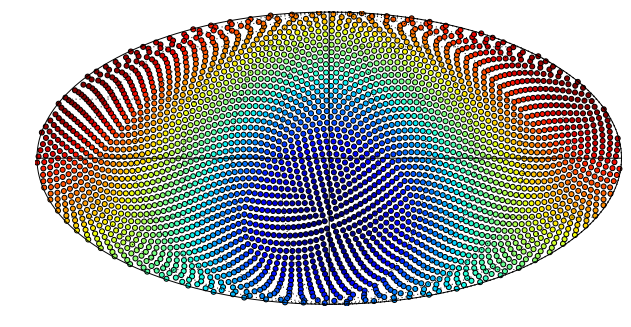

In [8]:
X_conv=conversion(ACO.obs,ACO.X[:,0],ACO.X[:,1])
hpy.mollview(title="",rot=(0,0,0))
hpy.graticule(verbose=0)
ax=hpy.projscatter(np.pi/2-X_conv[1,:],X_conv[0,:],lonlat=False,c=np.arange(np.size(X_conv,1)),marker='.',s=markersize)
plt.show()

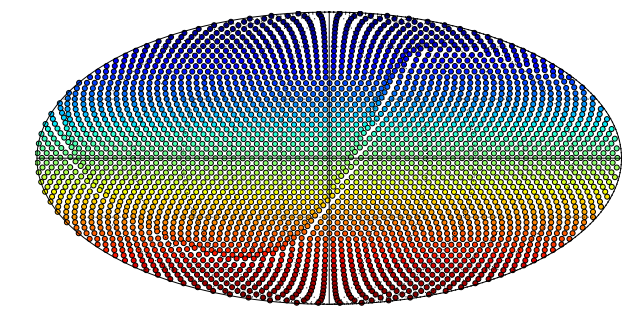

In [9]:
X_deconv=deconversion(ACO.obs,X_conv[0,:],X_conv[1,:])
hpy.mollview(title="",rot=(0,0,0))
hpy.graticule(verbose=0)
ax=hpy.projscatter(np.pi/2-X_deconv[1,:],X_deconv[0,:],lonlat=False,c=np.arange(np.size(X_deconv,1)),marker='.',s=markersize)
plt.show()

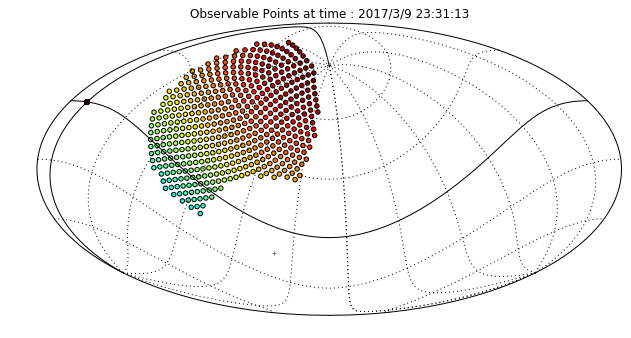

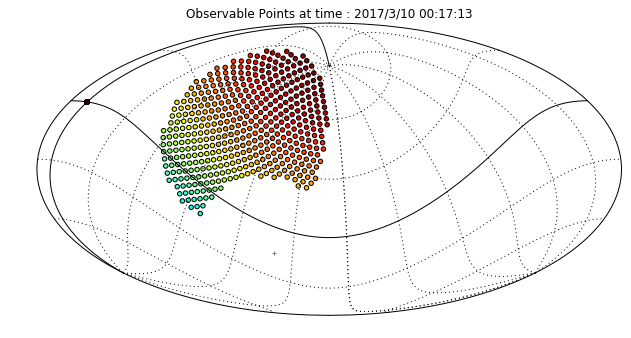

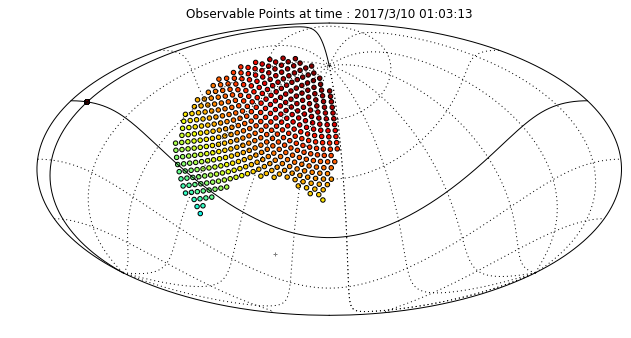

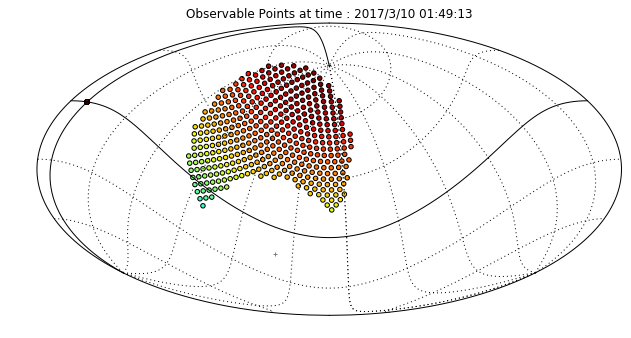

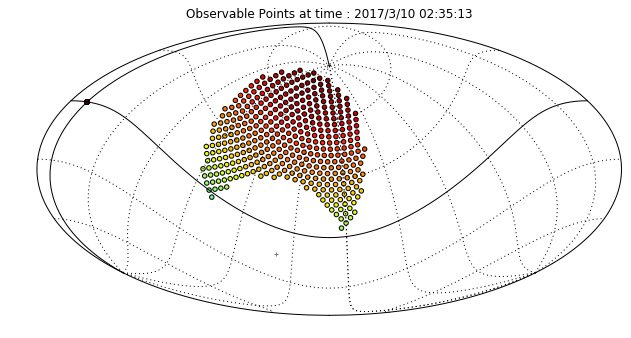

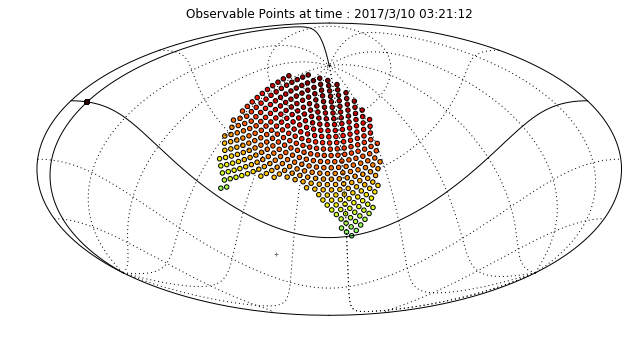

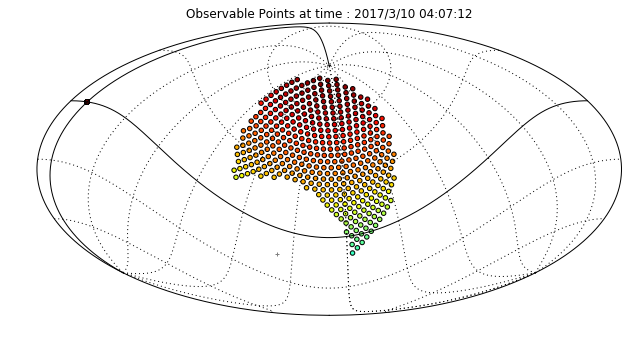

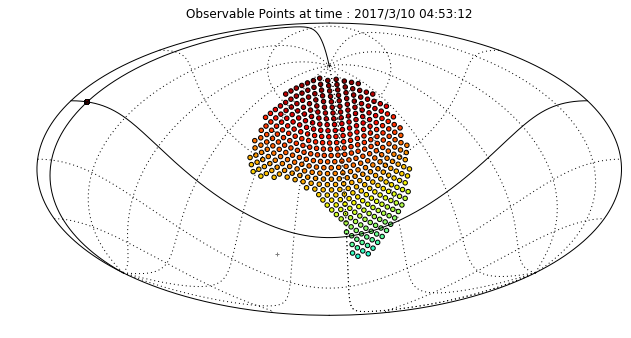

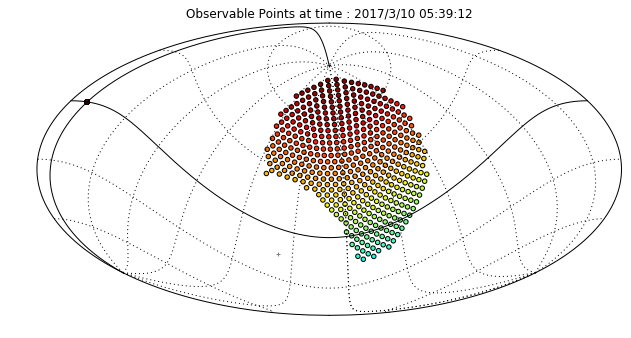

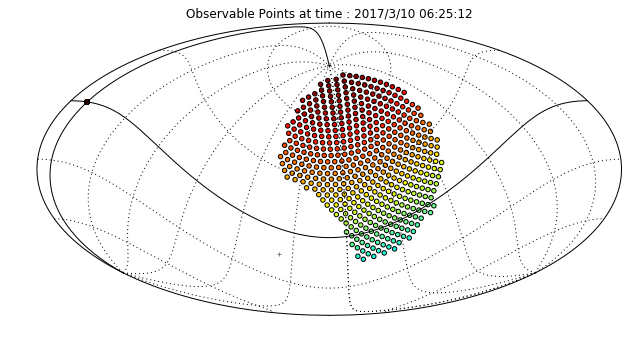

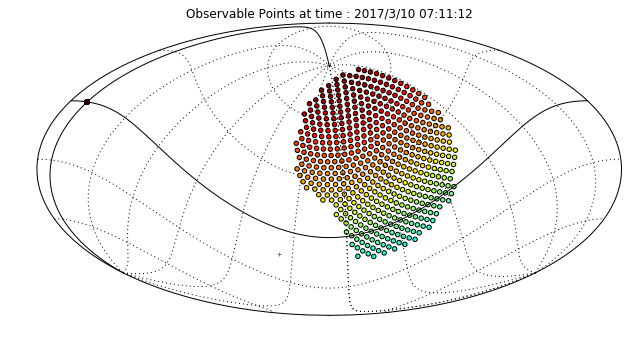

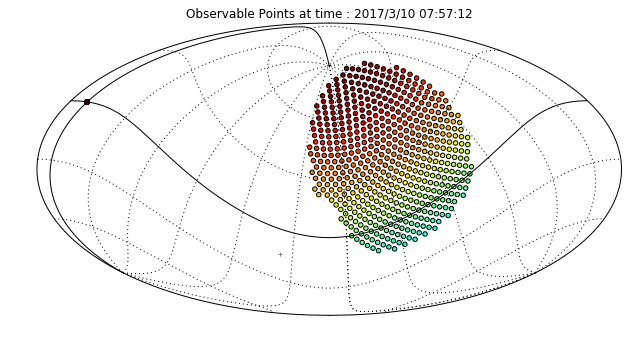

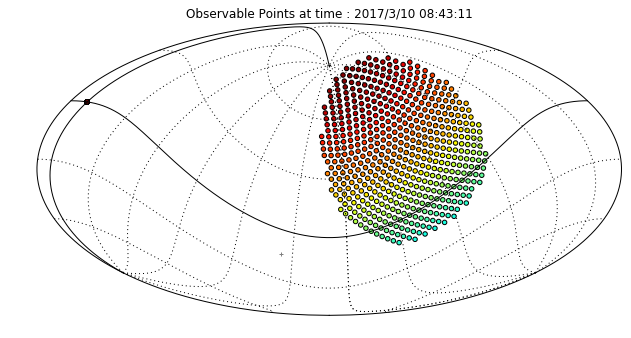

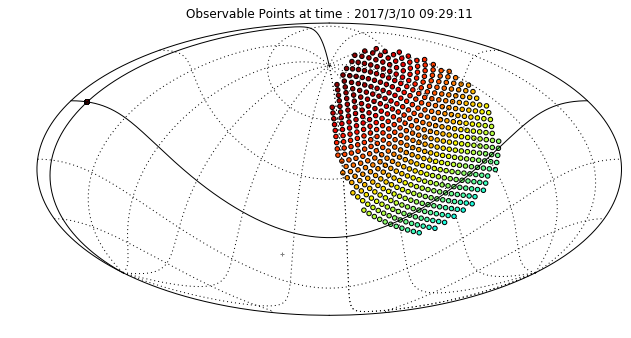

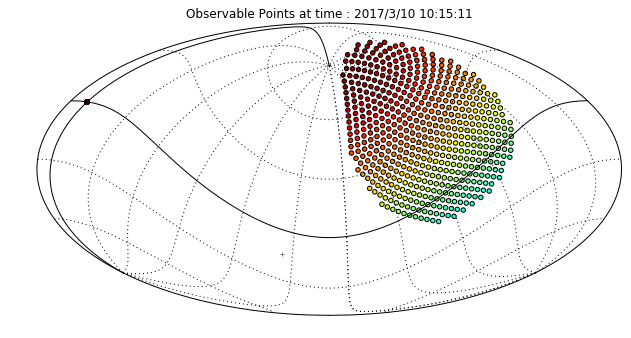

In [10]:
for i in range(ACO.NightDisc):
    ACO.X_fact=np.transpose(np.array([np.multiply(ACO.X[:,0],ACO.Fact[i]),np.multiply(ACO.X[:,1],ACO.Fact[i])]))
    hpy.mollview(title="Observable Points at time : "+str(ephem.Date(ACO.Times[i])),rot=(-10,-145,0))
    hpy.graticule(verbose=0)
    ax=hpy.projscatter(np.pi/2-ACO.X_fact[:,0],ACO.X_fact[:,1],lonlat=False,c=np.arange(np.size(ACO.X_fact,0)))
    ax=hpy.projscatter(np.pi/2-ACO.MAA[i,1],ACO.MAA[i,0],lonlat=False,marker='+',c='grey')
    plt.show()

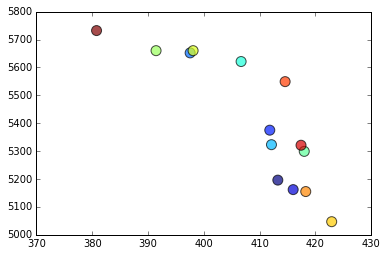

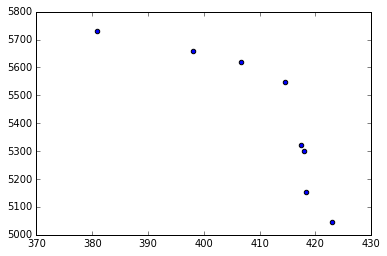

In [11]:
ACO.PlotParetoHistorial()
ACO.PlotParetoFront()

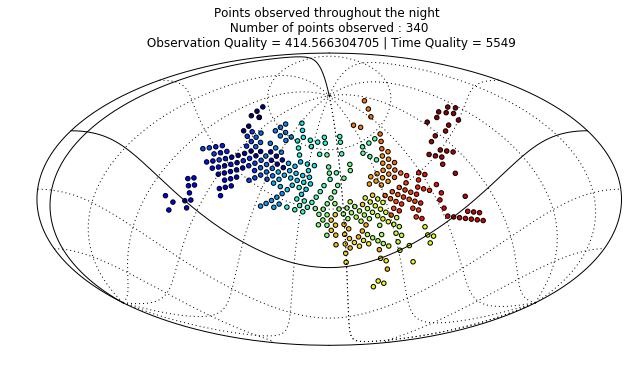

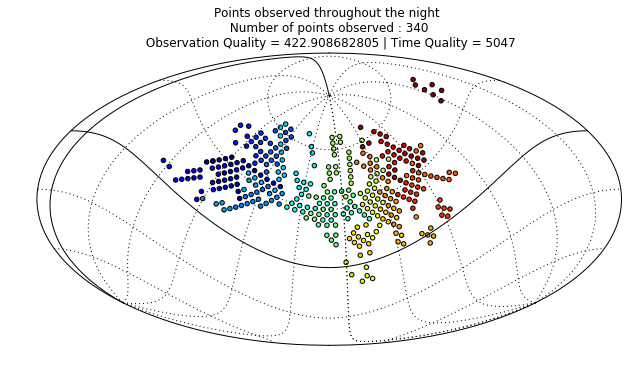

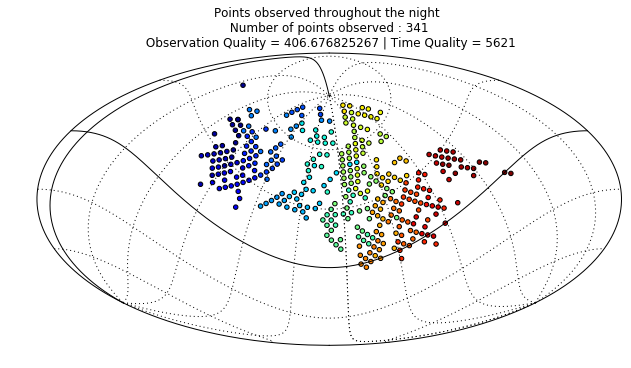

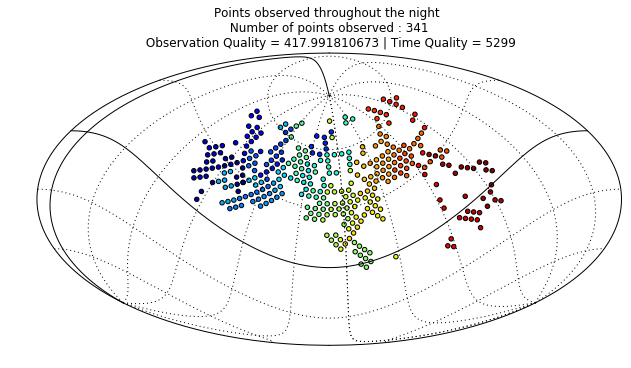

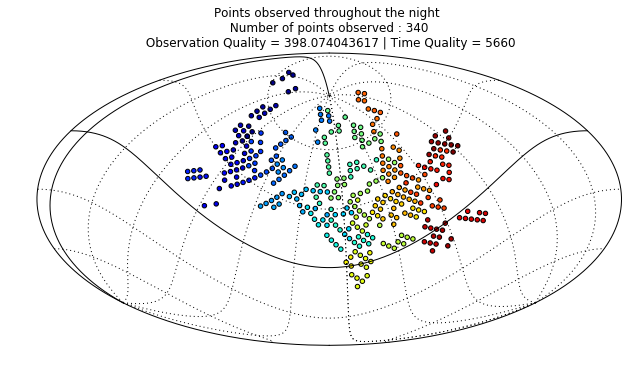

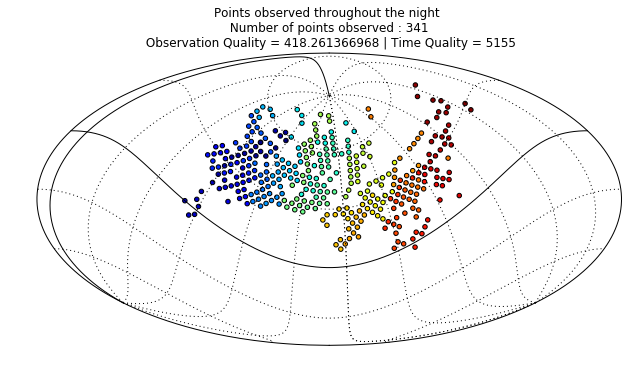

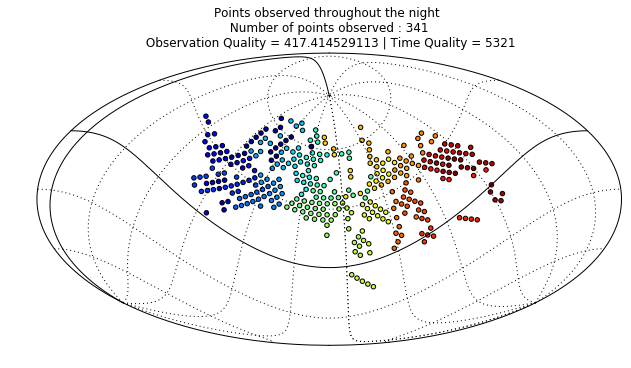

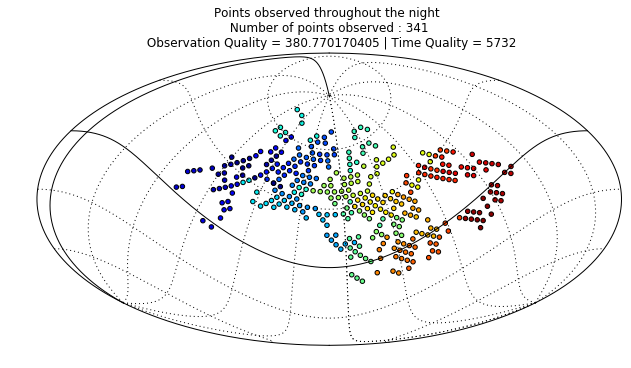

In [12]:
for i in range(len(ACO.BPS)):
    [schedAA,schedDR]=ACO.AZALT(ACO.BPS[i][0])
    schedAA = np.array(schedAA)
    schedDR = np.array(schedDR)
    hpy.mollview(title="Points observed throughout the night \n Number of points observed : "+str(np.size(ACO.BPS[i][0],0))+" \n Observation Quality = "+str(ACO.BPS[i][1])+" | Time Quality = "+str(ACO.BPS[i][2]),rot=(-10,-145,0))
    hpy.graticule(verbose=0)
    ax=hpy.projscatter(np.pi/2-schedDR[:,1],schedDR[:,0],lonlat=False,c=np.arange(np.size(schedDR,0)))
    #ax=hpy.projscatter(np.pi/2-ACO.MAA[i,1],ACO.MAA[i,0],lonlat=False,marker='+',c='grey')
    plt.show()

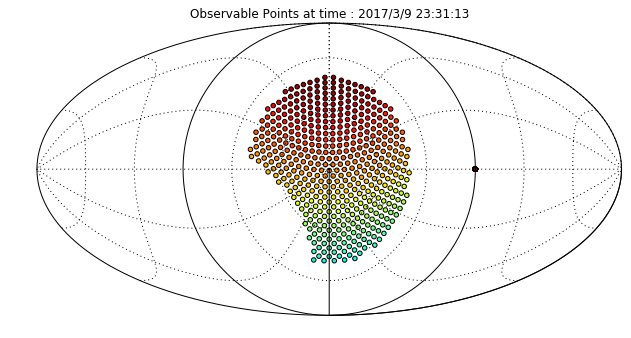

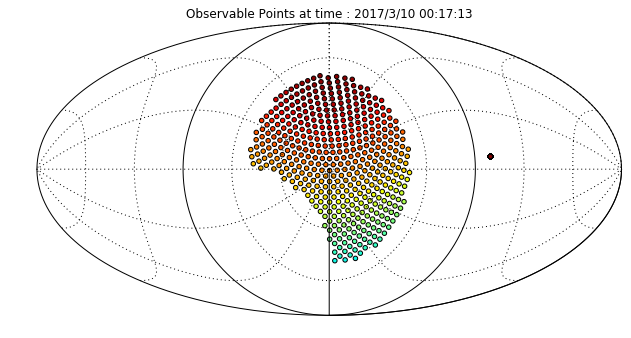

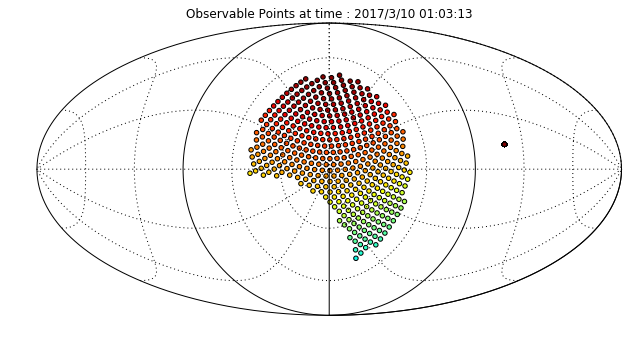

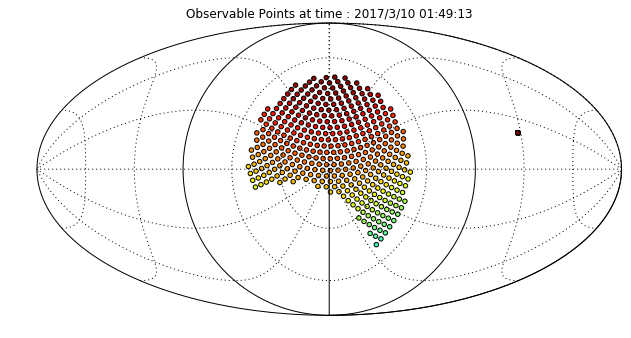

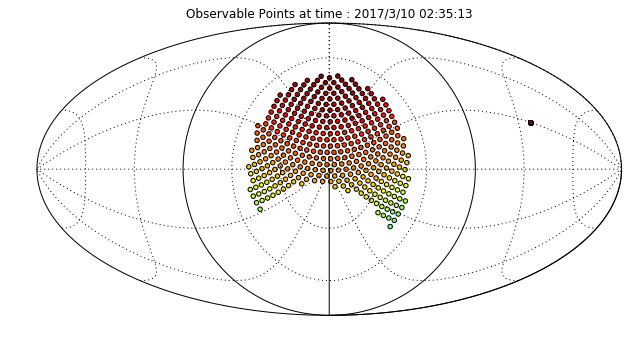

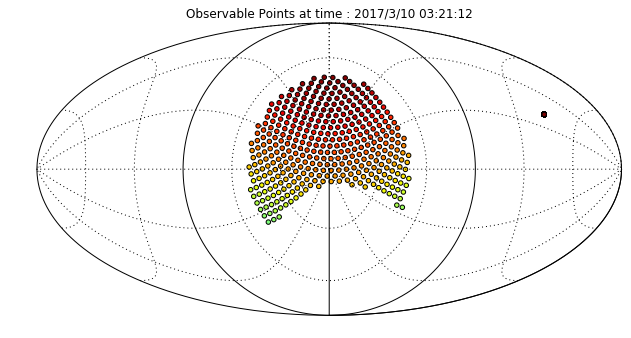

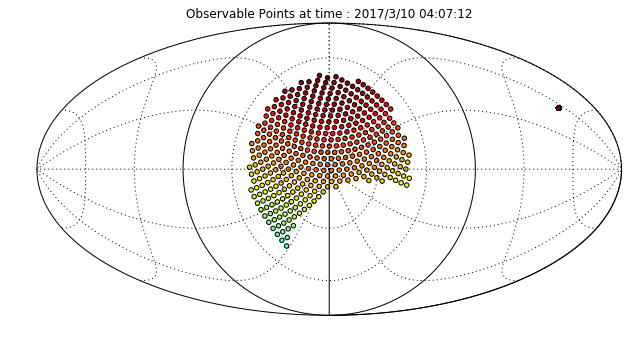

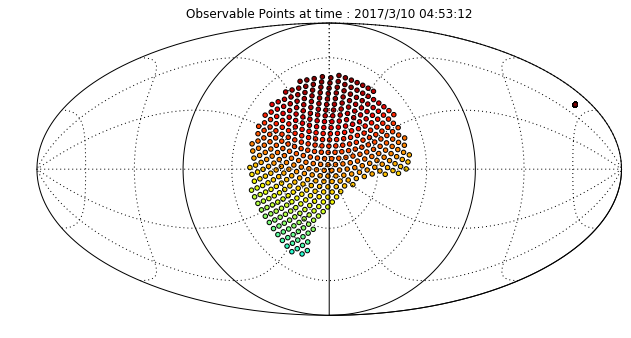

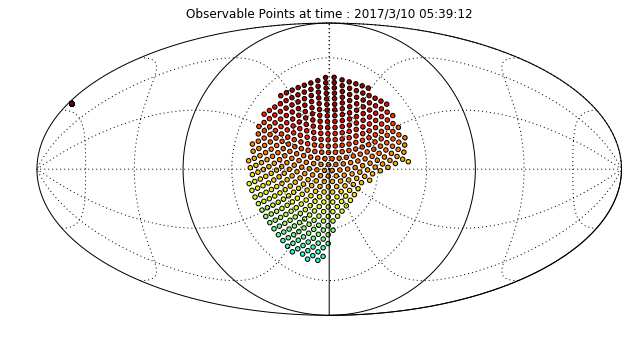

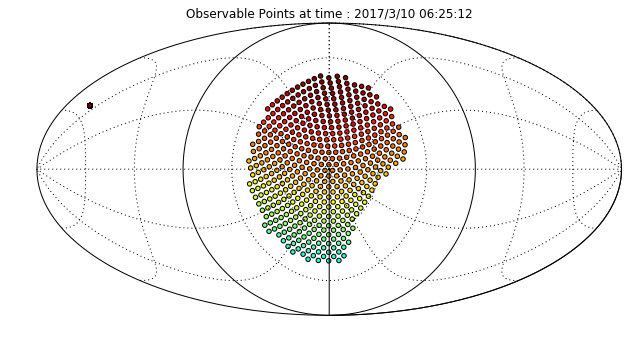

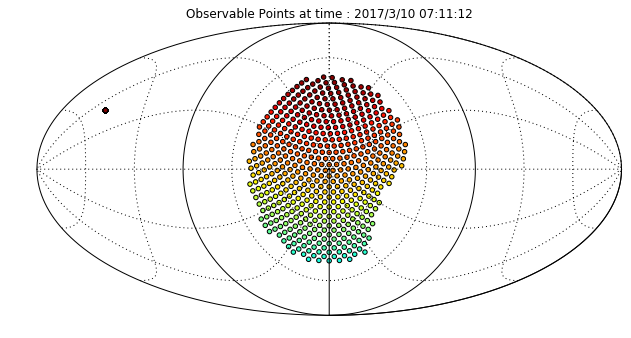

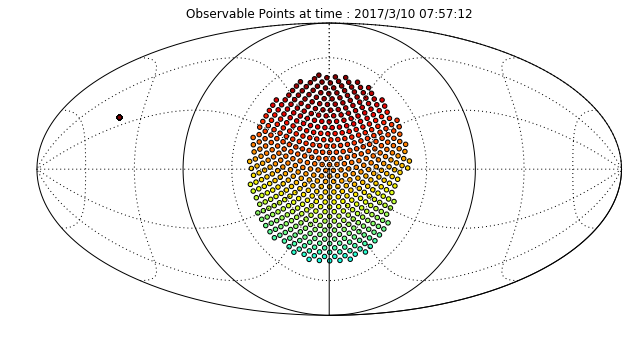

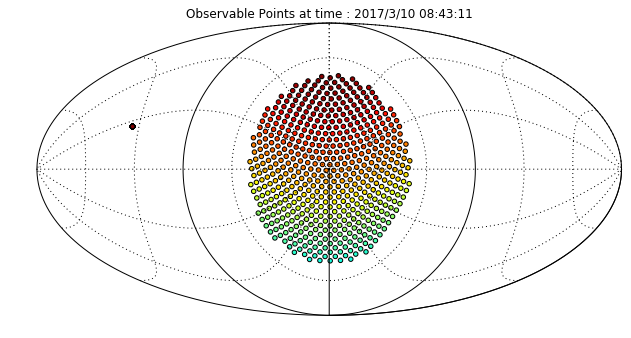

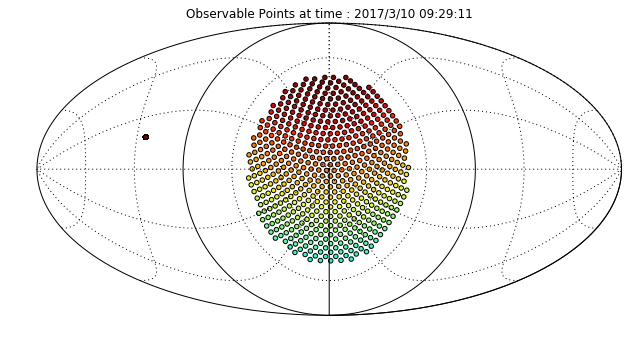

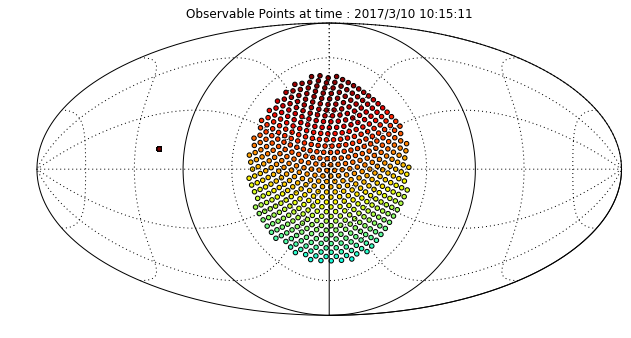

In [13]:
for i in range(ACO.NightDisc):
    ACO.X_fact=np.transpose(np.array([np.multiply(ACO.X[:,0],ACO.Fact[i]),np.multiply(ACO.X[:,1],ACO.Fact[i])]))
    ACO.obs.date = ACO.Times[i]
    ACO.X_fact=np.transpose(conversion(ACO.obs,ACO.X_fact[:,0],ACO.X_fact[:,1]))
    hpy.mollview(title="Observable Points at time : "+str(ephem.Date(ACO.Times[i])),rot=(0,90,0))
    hpy.graticule(verbose=0)
    ax=hpy.projscatter(np.pi/2-ACO.X_fact[:,1],ACO.X_fact[:,0],lonlat=False,c=np.arange(np.size(ACO.X_fact,0)))
    #ax=hpy.projscatter(np.pi/2-ACO.MAA[i,1],ACO.MAA[i,0],lonlat=False,marker='+',c='grey')
    plt.show()

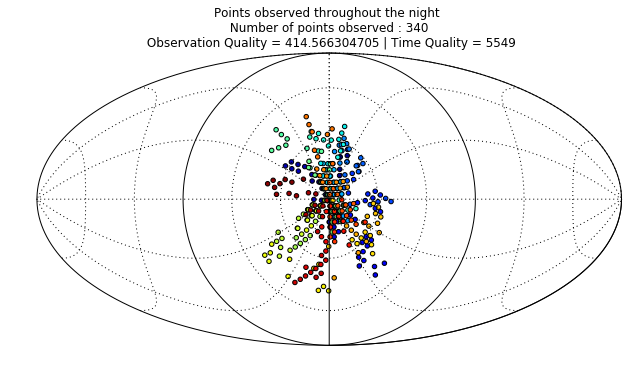

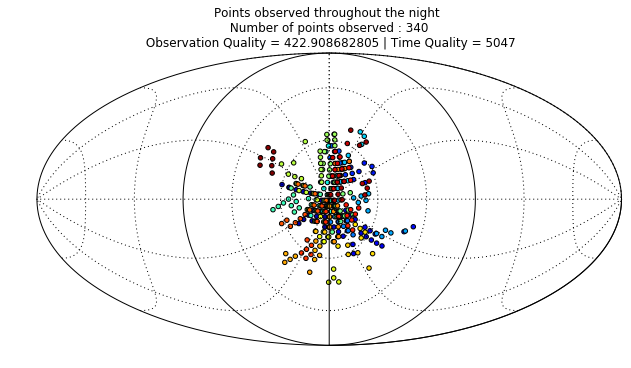

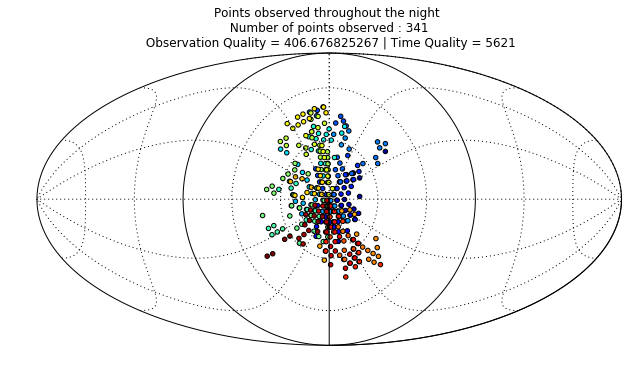

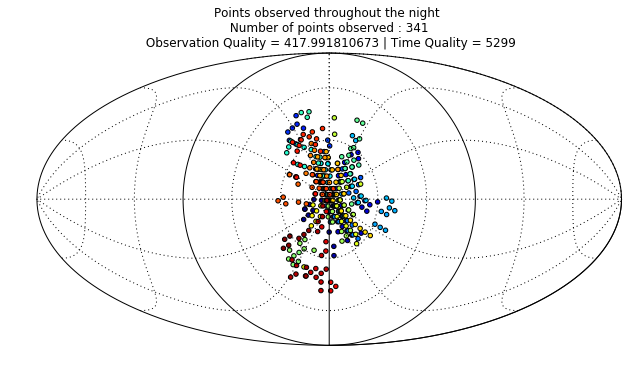

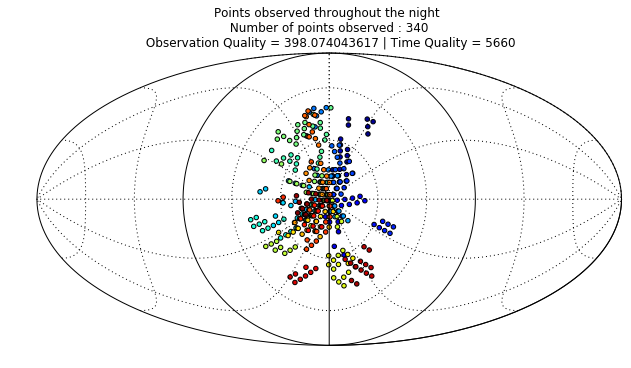

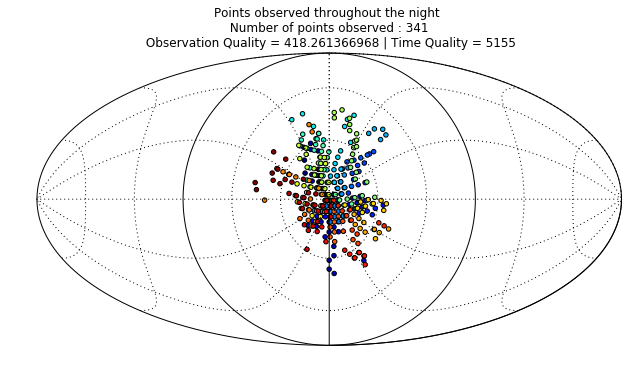

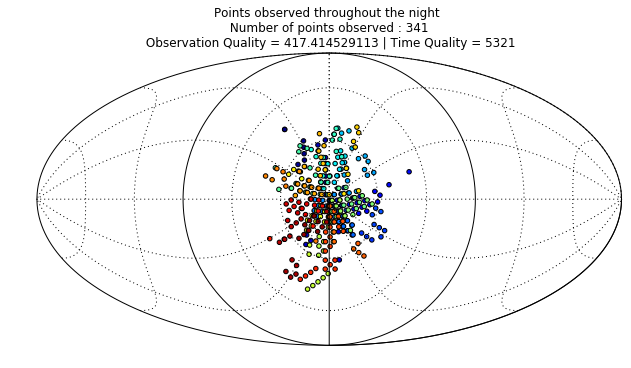

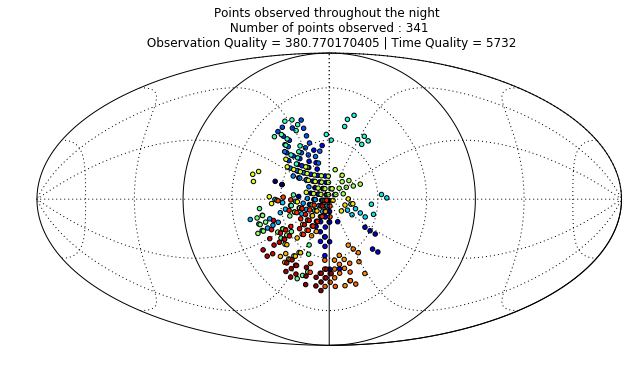

In [14]:
for i in range(len(ACO.BPS)):
    [schedAA,schedDR]=ACO.AZALT(ACO.BPS[i][0])
    schedAA = np.array(schedAA)
    schedDR = np.array(schedDR)
    hpy.mollview(title="Points observed throughout the night \n Number of points observed : "+str(np.size(ACO.BPS[i][0],0))+" \n Observation Quality = "+str(ACO.BPS[i][1])+" | Time Quality = "+str(ACO.BPS[i][2]),rot=(0,90,0))
    hpy.graticule(verbose=0)
    ax=hpy.projscatter(np.pi/2-schedAA[:,1],schedAA[:,0],lonlat=False,c=np.arange(np.size(schedAA,0)))
    #ax=hpy.projscatter(np.pi/2-ACO.MAA[i,1],ACO.MAA[i,0],lonlat=False,marker='+',c='grey')
    plt.show()

In [15]:
timenow = datetime.datetime.now()

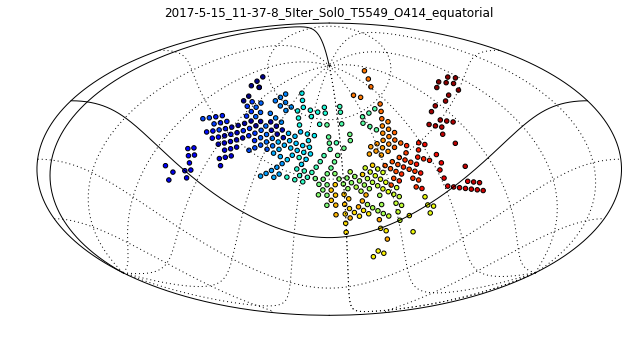

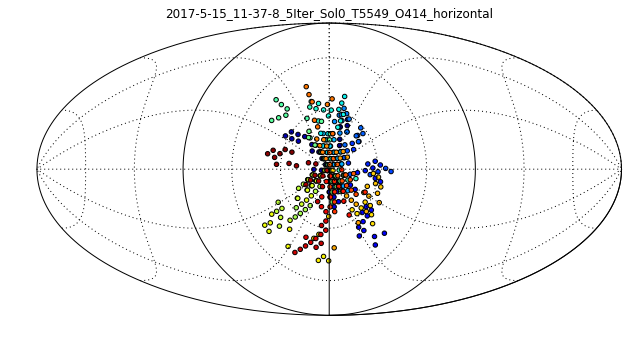

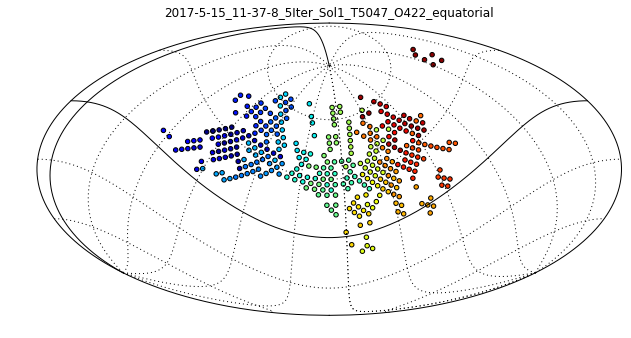

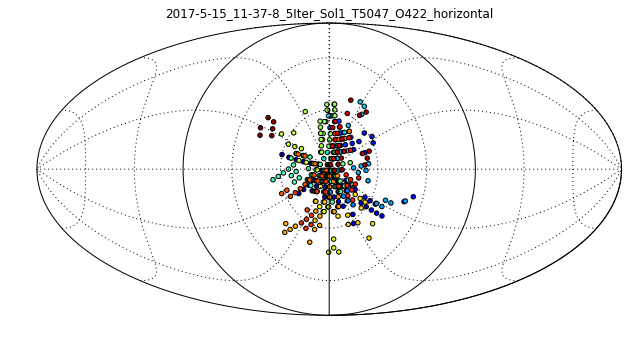

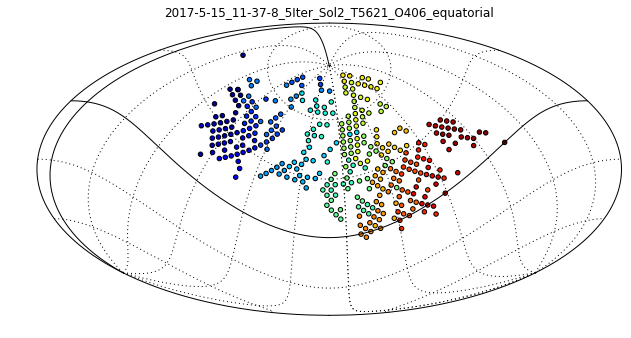

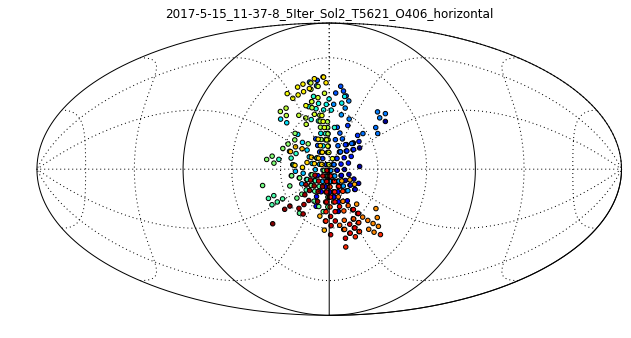

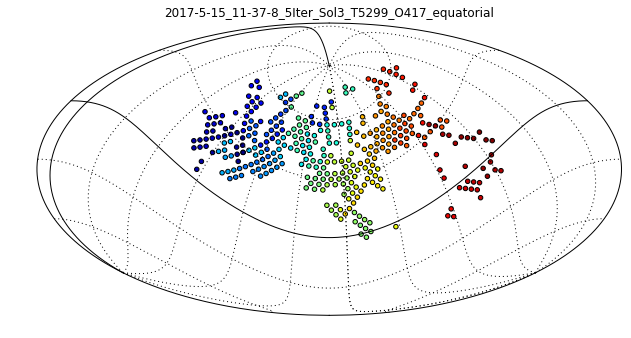

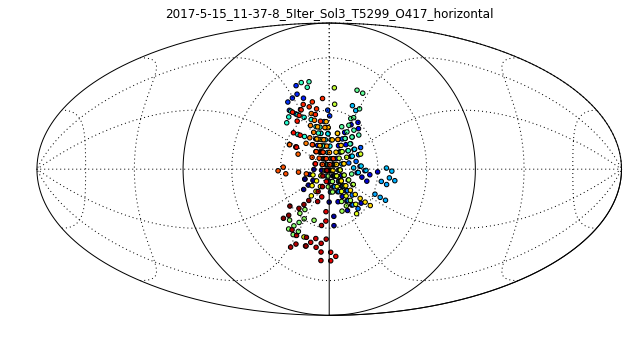

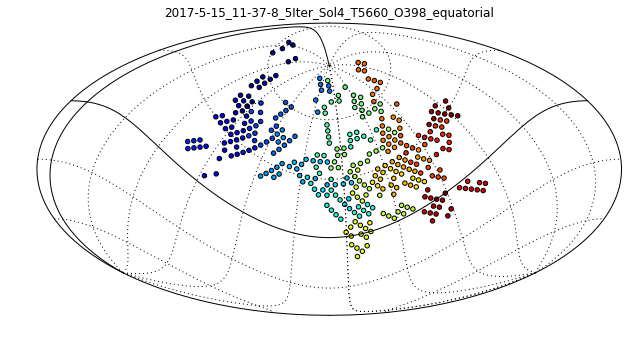

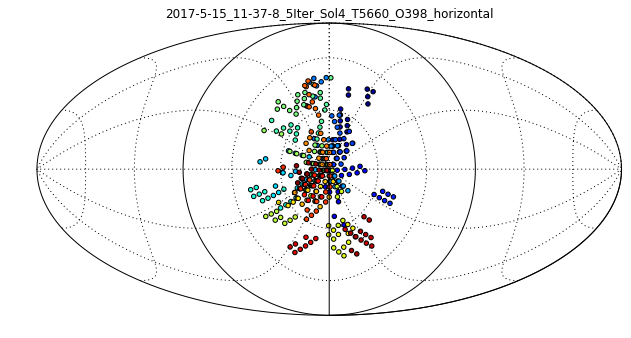

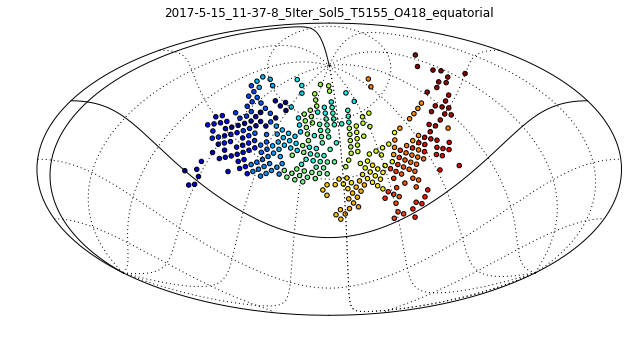

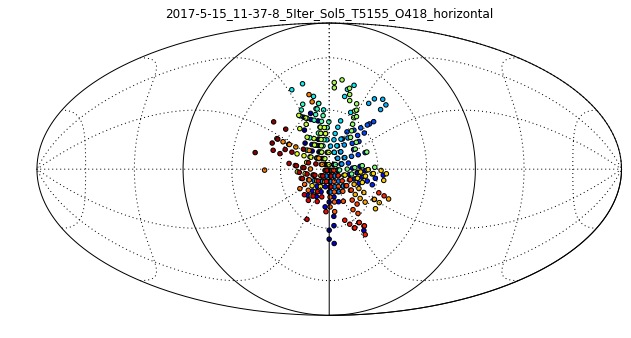

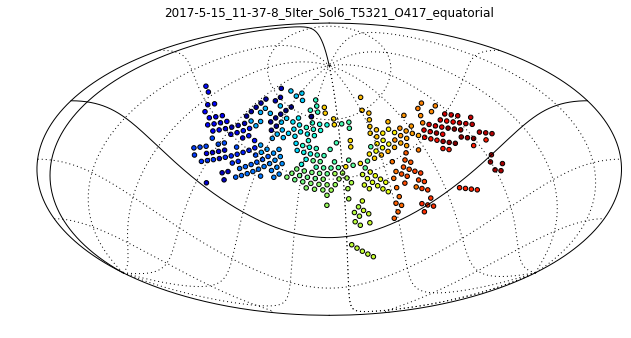

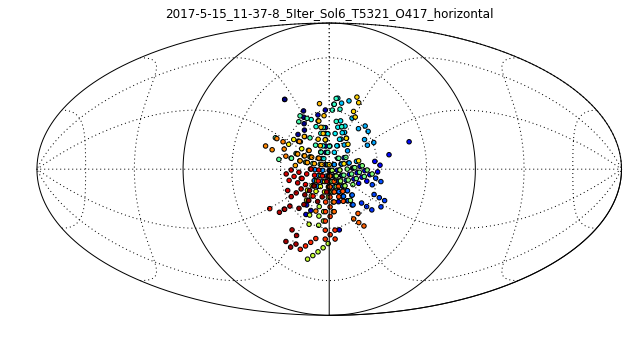

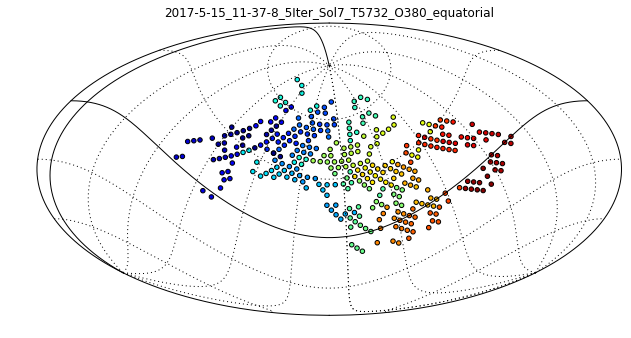

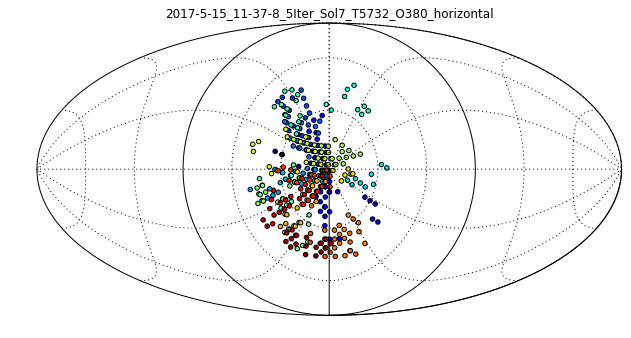

In [16]:
if(1):
    for i in range(len(ACO.BPS)):
        [schedAA,schedDR]=ACO.AZALT(ACO.BPS[i][0])
        animation_path(schedDR,(-10,-145,0),"%s-%s-%s_%s-%s-%s_%sIter_Sol%s_T%s_O%s_equatorial" % (timenow.year,timenow.month,timenow.day,timenow.hour,timenow.minute,timenow.second,ACO.AntIterations,i,ACO.BPS[i][2],int(ACO.BPS[i][1])))
        animation_path(schedAA,(0,90,0),"%s-%s-%s_%s-%s-%s_%sIter_Sol%s_T%s_O%s_horizontal" % (timenow.year,timenow.month,timenow.day,timenow.hour,timenow.minute,timenow.second,ACO.AntIterations,i,ACO.BPS[i][2],int(ACO.BPS[i][1])))